In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1. Definir parâmetros
# =========================
context_length = 256  # históricos para o modelo
horizon = 24          # passos a prever
N = context_length + horizon  # total da série

model_path = "moe_model.pt"
device = "cpu"

# =========================
# 2. Criar série sintética 
# =========================
t = np.arange(N)
series = np.sin(2 * np.pi * t / 50) + 0.1 * np.random.randn(N)

In [2]:
# =========================
# 2. Predizer via subprocess
# =========================
from setup.models.configuration_model import predict_from_model

preds = predict_from_model(model_path=model_path, series=series[:-horizon], context_length=context_length, device=device)
print(preds)

/home/user/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/user/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/torch/cuda/__init__.py:829: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0].


/home/user/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/user/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/user/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/torch/cuda/__init__.py:829: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 108660.73it/s]


tensor([[ 0.1108,  0.1287,  0.3172,  0.0301, -0.0657,  0.0307,  0.1962,  0.2266,
          0.1578,  0.1349,  0.2160,  0.2744,  0.6101,  0.2157,  0.1793,  0.1283,
         -0.1094, -0.1840, -0.2574, -0.5057, -0.6646, -0.7029, -0.6866, -0.7049]])


In [3]:
# =========================
# 3. Converter saída em array
# =========================
pred_list = preds.squeeze(0).tolist()
pred_array = np.array(pred_list)

In [4]:
pred_array

array([ 0.11076519,  0.12866709,  0.31715357,  0.03014269, -0.06568289,
        0.03073734,  0.19621423,  0.22662589,  0.15783817,  0.13491312,
        0.21595207,  0.2743825 ,  0.6101476 ,  0.21573569,  0.17934991,
        0.12828091, -0.10938416, -0.18400003, -0.25737542, -0.50571543,
       -0.66464764, -0.70294583, -0.6866414 , -0.70492017])

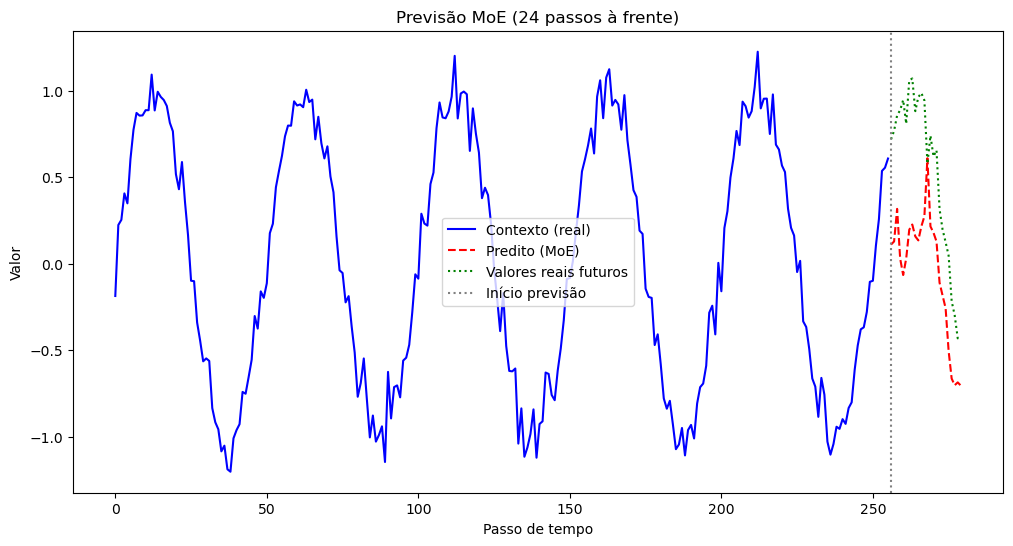

In [5]:
# =========================
# 4. Plotar
# =========================
context = series[:context_length]
future_real = series[context_length:] 

time_axis_context = range(context_length)
time_axis_pred = range(context_length, context_length + horizon)
time_axis_real = range(context_length, context_length + horizon)

plt.figure(figsize=(12,6))
plt.plot(time_axis_context, context, label="Contexto (real)", color="blue")
plt.plot(time_axis_pred, pred_array, label="Predito (MoE)", color="red", linestyle="--")
plt.plot(time_axis_real, future_real, label="Valores reais futuros", color="green", linestyle=":")

plt.axvline(context_length, color="gray", linestyle=":", label="Início previsão")
plt.legend()
plt.xlabel("Passo de tempo")
plt.ylabel("Valor")
plt.title(f"Previsão MoE ({horizon} passos à frente)")
plt.show()